In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r'C:\Users\pnaik27\Anaconda\Algorithm\Linear Regression\DataSet\CAR DETAILS FROM CAR DEKHO.csv')
df.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner


In [3]:
name=[]
for i in df['name']:
    x=i.split(' ')
    name.append(x[0])

In [4]:
df['Brand_name']=pd.DataFrame(name)

In [5]:
df.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Brand_name
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai


In [6]:
df['Age']=2020-df['year']

In [7]:
df.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Brand_name,Age
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,13
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,13
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,8


In [8]:
df.drop(columns=['name','year'],inplace=True)

In [9]:
df.head(4)

,selling_price,km_driven,fuel,seller_type,transmission,owner,Brand_name,Age
0,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,13
1,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,13
2,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,8
3,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,3


In [13]:
df.drop(index=df[df['km_driven']==1].index,inplace=True)

In [ ]:
for i in df.columns():
    print(df[i].value_counts())

In [14]:
df['Brand_name'].value_countsunts()

Maruti           1280
Hyundai           821
Mahindra          364
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Datsun             37
Fiat               37
Mercedes-Benz      35
Jaguar              6
Mitsubishi          6
Land                5
Volvo               4
Ambassador          4
Jeep                3
OpelCorsa           2
MG                  2
Daewoo              1
Isuzu               1
Force               1
Kia                 1
Name: Brand_name, dtype: int64

In [17]:
m=df[(df['Brand_name']=='Kia')|(df['Brand_name']=='Force')| (df['Brand_name']=='Isuzu')| (df['Brand_name']=='Daewoo')].index
m

Int64Index([1450, 1541, 2138, 3046], dtype='int64')

In [18]:
df.drop(index=m,inplace=True)

In [19]:
df['Brand_name'].value_counts()

Maruti           1280
Hyundai           821
Mahindra          364
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Datsun             37
Fiat               37
Mercedes-Benz      35
Mitsubishi          6
Jaguar              6
Land                5
Volvo               4
Ambassador          4
Jeep                3
OpelCorsa           2
MG                  2
Name: Brand_name, dtype: int64

<AxesSubplot:>

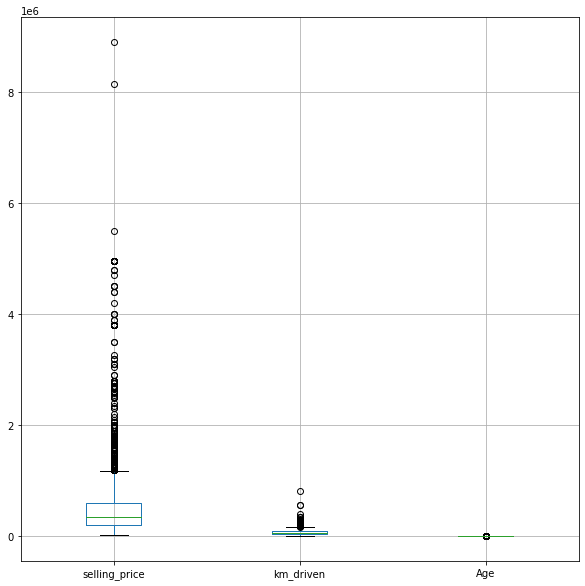

In [20]:
df.boxplot(figsize=(10,10))

In [21]:
df['Log_km_driven']=np.log10(df['km_driven'])

In [22]:
df.head(3)

,selling_price,km_driven,fuel,seller_type,transmission,owner,Brand_name,Age,Log_km_driven
0,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,13,4.845098
1,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,13,4.698970
2,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,8,5.000000


In [23]:
df.drop(columns='km_driven',inplace=True)

In [24]:
df.head(3)

,selling_price,fuel,seller_type,transmission,owner,Brand_name,Age,Log_km_driven
0,60000,Petrol,Individual,Manual,First Owner,Maruti,13,4.845098
1,135000,Petrol,Individual,Manual,First Owner,Maruti,13,4.698970
2,600000,Diesel,Individual,Manual,First Owner,Hyundai,8,5.000000


In [25]:
scaler=StandardScaler()
var=['Age','Log_km_driven']
df[var]=scaler.fit_transform(df[var])
df.head(2)

,selling_price,fuel,seller_type,transmission,owner,Brand_name,Age,Log_km_driven
0,60000,Petrol,Individual,Manual,First Owner,Maruti,1.44588,0.382305
1,135000,Petrol,Individual,Manual,First Owner,Maruti,1.44588,0.002272


In [30]:
df=pd.get_dummies(df,columns=['fuel', 'seller_type', 'transmission', 'owner','Brand_name'],drop_first=True)

In [31]:
df.head(2)

,selling_price,Age,Log_km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,...,Brand_name_Mercedes-Benz,Brand_name_Mitsubishi,Brand_name_Nissan,Brand_name_OpelCorsa,Brand_name_Renault,Brand_name_Skoda,Brand_name_Tata,Brand_name_Toyota,Brand_name_Volkswagen,Brand_name_Volvo
0,60000,1.44588,0.382305,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,135000,1.44588,0.002272,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [32]:
y=df['selling_price']
x=df.drop(columns='selling_price')

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=355)

In [34]:
reg_model=LinearRegression()
reg_model.fit(x_train,y_train)

LinearRegression()

In [35]:
y_pred=reg_model.predict(x_test)

In [36]:
data=pd.DataFrame({'Actual':y_test,
                  'Prediction':y_pred})
data

,Actual,Prediction
2769,525000,5.093349e+05
592,1580000,1.944827e+06
2901,200000,3.282189e+05
2795,495000,6.605132e+05
2783,62000,-1.749849e+05
...,...,...
1164,400000,2.788347e+05
150,800000,6.816282e+05
1002,1050000,8.621616e+05
3241,75000,-6.004913e+04


In [37]:
reg_model.score(x_train,y_train)

0.6944909750977859

In [38]:
reg_model.score(x_test,y_test)

0.67584534335228

In [39]:
import statsmodels.api as sm

In [40]:
model_1=sm.OLS(endog=y,exog=x).fit()
print(model_1.summary())

                                 OLS Regression Results                                
Dep. Variable:          selling_price   R-squared (uncentered):                   0.823
Model:                            OLS   Adj. R-squared (uncentered):              0.821
Method:                 Least Squares   F-statistic:                              539.7
Date:                Thu, 10 Dec 2020   Prob (F-statistic):                        0.00
Time:                        16:12:14   Log-Likelihood:                         -61140.
No. Observations:                4335   AIC:                                  1.224e+05
Df Residuals:                    4298   BIC:                                  1.226e+05
Df Model:                          37                                                  
Covariance Type:            nonrobust                                                  
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [42]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score
ridge_model = RidgeCV(alphas=np.logspace(-10, 10, 30), cv=5)

ridge_model.fit(x_train, y_train)

scores = cross_val_score(ridge_model, x_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())

#training score
print("Training Score:", ridge_model.score(x_train, y_train))
# evaluate the data on the test set
print("Test Score:", ridge_model.score(x_test, y_test))

Cross-validated training scores: [0.664638   0.71935538 0.67294166 0.70029558 0.58538698]
Mean cross-validated training score: 0.6685235203533532
Training Score: 0.6935955163653031
Test Score: 0.6725052233859465


In [43]:
from sklearn.linear_model import LassoCV
# create a LassoCV model instance
lasso_model = LassoCV(eps= [.0001, .001, .01, .1], alphas=np.logspace(-8, 8, 20), max_iter = 1000000, cv=5)
# fit the model
lasso_model.fit(x_train, y_train)
# evaluate on the training set
training_score = lasso_model.score(x_train, y_train)
# evaluate on the test set
test_score = lasso_model.score(x_test, y_test)
#mean cv score on training data
scores = cross_val_score(lasso_model, x_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())

#training score
print("Training Score:", lasso_model.score(x_train, y_train))
# evaluate the data on the test set
print("Test Score:", lasso_model.score(x_test, y_test))

Cross-validated training scores: [0.66394072 0.71856064 0.67531759 0.70183025 0.5810466 ]
Mean cross-validated training score: 0.6681391586548341
Training Score: 0.6944686758071159
Test Score: 0.6756148752644745


In [44]:
#Elastic net model with scores
from sklearn.linear_model import ElasticNetCV
enet_model = ElasticNetCV(alphas=np.logspace(-4, 4, 10), 
                     l1_ratio=np.array([.1, .5, .7, .9, .95, .99, 1]),
                     max_iter = 100000,
                     cv=5)
# fit the model
enet_model.fit(x_train, y_train)
# evaluate on the training set
training_score = enet_model.score(x_train, y_train)
# evaluate on the test set
test_score = enet_model.score(x_test, y_test)
#mean cv score on training data
scores = cross_val_score(enet_model, x_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
print()
#training score
print("Training Score:", enet_model.score(x_train, y_train))
# evaluate the data on the test set
print("Test Score:", enet_model.score(x_test, y_test))

C:\Users\pnaik27\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5173613362900.625, tolerance: 67496453486.78379
  tol, rng, random, positive)
C:\Users\pnaik27\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5642308018678.219, tolerance: 68434196497.93346
  tol, rng, random, positive)


Cross-validated training scores: [0.66491965 0.71940112 0.67371176 0.69992252 0.58624333]
Mean cross-validated training score: 0.6688396739527869

Training Score: 0.6926392039827061
Test Score: 0.6699594681941246


Text(0, 0.5, 'Feature')

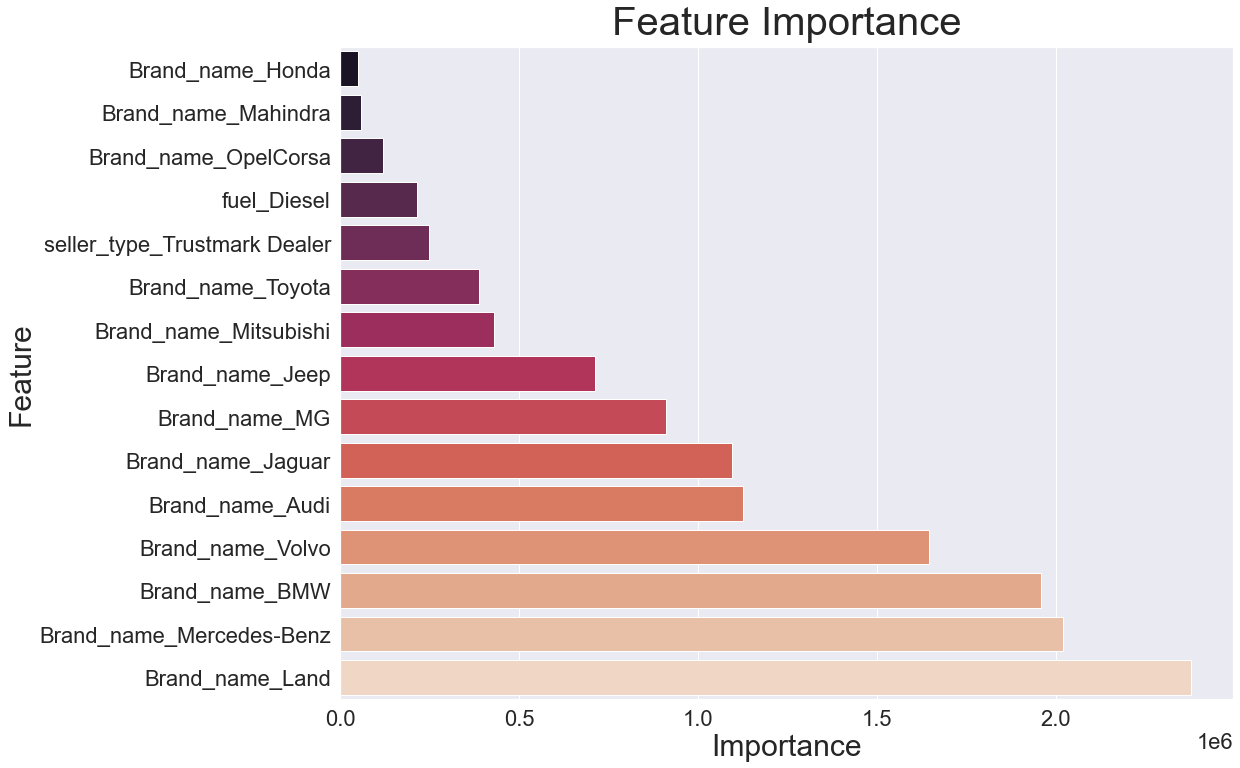

In [45]:
fi = pd.DataFrame({
    'feature': x_train.columns,
    'importance': lasso_model.coef_
})
fi.sort_values('importance', ascending=True, inplace=True)
#sns.set_style('ticks')
sns.set(font_scale = 2)
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(16, 12)
sns.barplot(x='importance', y='feature', data=fi[-15:], orient='h', palette = 'rocket', saturation=0.7)  
ax.set_title("Feature Importance", fontsize=40, y=1.01)
ax.set_xlabel('Importance', fontsize = 30)
ax.set_ylabel('Feature', fontsize = 30)

In [48]:
predictions = lasso_model.predict(x_test)
residuals_df = pd.DataFrame(predictions, y_test)
residuals_df.reset_index(inplace = True)
residuals_df.rename({'selling_price': 'actual', 0: 'predictions'}, axis = 1, inplace = True)
residuals_df['residuals'] = residuals_df.actual - residuals_df.predictions
residuals_df

,actual,predictions,residuals
0,525000,5.108014e+05,14198.595173
1,1580000,1.943593e+06,-363592.864051
2,200000,3.286056e+05,-128605.641509
3,495000,6.604868e+05,-165486.755323
4,62000,-1.752013e+05,237201.277404
...,...,...,...
1426,400000,2.793936e+05,120606.442446
1427,800000,6.818481e+05,118151.866349
1428,1050000,8.621564e+05,187843.608433
1429,75000,-6.026212e+04,135262.122328


Text(0, 0.5, 'Actual')

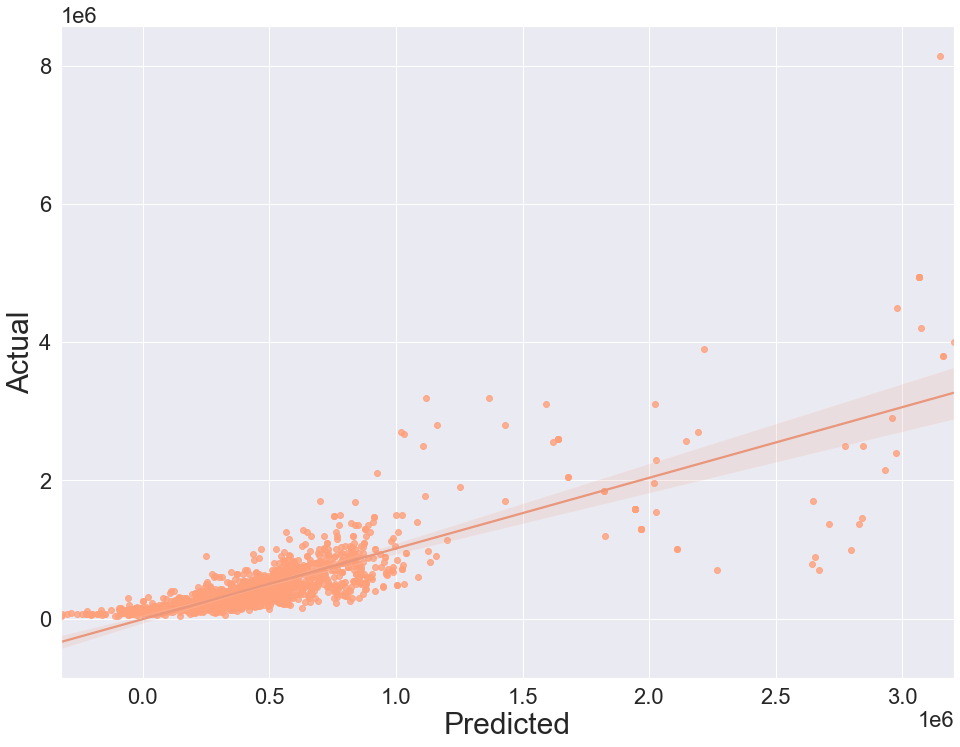

In [49]:
#predicted y values
predictions = lasso_model.predict(x_test)
#residuals (or error between predictions and actual)
residuals = y_test - predictions
sns.axes_style(style='white')
sns.set(font_scale = 2)
fig, ax = plt.subplots()
fig.set_size_inches(16, 12)
ax = sns.regplot(x="predictions", y="actual", data= residuals_df,  scatter_kws = {'color': 'lightsalmon'}, 
                 line_kws = {'color': 'darksalmon'})
ax.set_xlabel('Predicted', fontsize = 30)
ax.set_ylabel('Actual', fontsize = 30)

In [50]:
from sklearn.metrics import mean_squared_error
(mean_squared_error(y_test, predictions))**0.5

333815.7439164893